In [1]:
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import random
import numpy as np

/media/SSD/ThangND34_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = 'bigclone'
model = 'codebert'
percent = '20'
number_of_samples = 3000
train_gradients =  torch.load(os.path.join('checkpoints', f'{data}', f'{data}_{model}_train_noise_{percent}%', f'noise{percent}%.grad'))

In [3]:
pd_data = pd.read_csv(f'data/{data}/processed/noise/noise{percent}%.csv')

In [4]:
min_class = min(set(pd_data['label']))
max_class = max(set(pd_data['label']))
    
samples = random.sample(train_gradients, number_of_samples)
results = torch.zeros(len(samples), len(samples), dtype=float)

In [5]:
for p, gt in enumerate(tqdm.tqdm(samples)):
    for q, g in enumerate(samples):
        influence = sum([torch.sum(k * j).data for k, j in zip(gt, g)])
        influence = float(influence.cpu().detach().numpy())
        results[p][q] = influence
results = results.cpu().detach().numpy()
values = []
for i in range(number_of_samples-1):
    for j in range(i+1, number_of_samples):
        values.append(results[i][j])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [04:14<00:00, 11.81it/s]


In [6]:
# subclass
# for c in range(min_class, max_class + 1):
subclass0 = []
data_class = pd_data[pd_data['label']==0][:number_of_samples] # lay number_of_samples samples moi class
n = len(data_class.index)
results =  np.zeros((n,n))
for p, gt in enumerate(tqdm.tqdm(range(n))):
    gt = train_gradients[data_class.index[p]]
    for q, g in enumerate(range(n)):
        g = train_gradients[data_class.index[q]]
        influence = sum([torch.sum(k * j).data for k, j in zip(gt, g)])
        influence = float(influence.cpu().detach().numpy())
        results[p][q] = influence 
# values = []
for i in range(n-1):
    for j in range(i+1, n):
        subclass0.append(results[i][j])
# fig, ax = plt.subplots(1, 1)
# ax.hist(values, bins=100)
# plt.savefig(f'figures/{data}/dot/{data}_grad_dot_class_{c}.pdf')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [03:46<00:00, 13.26it/s]


In [7]:
# subclass
# for c in range(min_class, max_class + 1):
subclass1 = []
data_class = pd_data[pd_data['label']==1][:number_of_samples] # lay 1000 samples moi class
n = len(data_class.index)
results =  np.zeros((n,n))
for p, gt in enumerate(tqdm.tqdm(range(n))):
    gt = train_gradients[data_class.index[p]]
    for q, g in enumerate(range(n)):
        g = train_gradients[data_class.index[q]]
        influence = sum([torch.sum(k * j).data for k, j in zip(gt, g)])
        influence = float(influence.cpu().detach().numpy())
        results[p][q] = influence 
# values = []
for i in range(n-1):
    for j in range(i+1, n):
        subclass1.append(results[i][j])
# fig, ax = plt.subplots(1, 1)
# ax.hist(values, bins=100)
# plt.savefig(f'figures/{data}/dot/{data}_grad_dot_class_{c}.pdf')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [03:48<00:00, 13.15it/s]


In [8]:
# subclass2 = []
# data_class = pd_data[pd_data['label']==2][:number_of_samples] # lay 1000 samples moi class
# n = len(data_class.index)
# results =  np.zeros((n,n))
# for p, gt in enumerate(tqdm.tqdm(range(n))):
#     gt = train_gradients[data_class.index[p]]
#     for q, g in enumerate(range(n)):
#         g = train_gradients[data_class.index[q]]
#         influence = sum([torch.sum(k * j).data for k, j in zip(gt, g)])
#         influence = float(influence.cpu().detach().numpy())
#         results[p][q] = influence 
# # values = []
# for i in range(n-1):
#     for j in range(i+1, n):
#         subclass2.append(results[i][j])

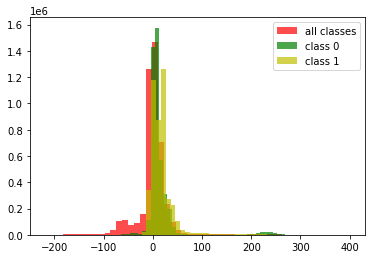

In [9]:
fig, ax = plt.subplots(1, 1)
all_class = ax.hist(np.array(values), facecolor='r',alpha=0.7, bins=50, label='all classes')
class_0 = ax.hist(np.array(subclass0), facecolor='g',alpha=0.7, bins=50, label='class 0')
class_1 = ax.hist(np.array(subclass1), facecolor='y',alpha=0.7, bins=50, label='class 1')
# class_2 = ax.hist(np.array(subclass2), facecolor='blue',alpha=0.7, bins=50, label='class 2')
# ax.set_title('Dot product of gradient\'s samples in IMDB training set')
plt.legend(loc="upper right")
plt.savefig(f'figures/{data}/{data}_grad_dot_combineplot.pdf')

In [10]:
# plt.savefig(f'figures/{data}/{data}_grad_dot_combineplot.pdf')